In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from functions_volcell import *

In [6]:
# volcell path -> 0 = no cell, nonzero = row index in features table
pth_volcell = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\volcell_super_good_version\volcell_linked_v2.mat'

# features table (normalized intensity cols via z-score)
pth_features_table = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\volcell_super_good_version\features_table_w_norms.mat'

In [7]:
volcell = load_var_from_mat(pth_volcell, "volcell")

In [8]:
features_table = load_var_from_mat(pth_features_table, "features_table")

In [9]:
# I forgot to save the colnames within the other file, so I'll just load it in like this via a separate mat file that I made
pth_colnames_var = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\volcell_super_good_version\colnames_feature_table.mat'
colnames = load_var_from_mat(pth_colnames_var, "colnames")
colnames = [i.split(" ")[0] for i in colnames]  # remove spaces that got incorporated into the char array

# I forgot to add the last col name (slide num)
colnames.append("Slide_num")

In [10]:
features_table.shape

(21, 471431770)

In [11]:
features_df = pd.DataFrame(np.transpose(features_table), columns=colnames)

In [12]:
volcell.shape

(1136, 4444, 3161)

In [13]:
# clean memory
del features_table
del colnames

In [14]:
features_df.head()

,reg_cent_x_5x_cropped,reg_cent_y_5x_cropped,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect,compactness,eccentricity,...,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity,Slide_num
0,1474.056152,945.946045,26544.0,26368.0,116.06250,39.656250,0.926270,1.109375,13.562500,0.433594,...,1.079102,8.085938,6.050781,5.828125,11.687500,2644.000,-3.832194,-1.286964,-5.784726,1.0
1,1492.262939,944.924866,26656.0,26368.0,37.09375,24.468750,0.778320,1.441406,16.140625,0.720215,...,1.284180,4.996094,3.382812,3.212891,5.859375,6628.000,-2.854962,0.221918,-3.756695,1.0
2,1492.253052,946.576660,26656.0,26384.0,49.37500,27.078125,0.846191,1.336914,14.851562,0.663574,...,1.181641,5.500000,3.894531,3.853516,6.960938,139.875,-4.296976,-1.396303,-5.561163,1.0
3,1494.203735,943.069031,26672.0,26352.0,114.56250,41.031250,0.854980,1.791016,14.695312,0.829590,...,1.169922,8.218750,5.898438,5.714844,9.132812,5036.000,-4.070544,-1.363501,-6.136038,1.0
4,2830.413330,867.558228,36640.0,28704.0,129.37500,42.625000,0.895508,1.405273,14.031250,0.702637,...,1.117188,9.437500,6.347656,6.062500,11.031250,9056.000,-0.161613,0.079777,-1.121853,1.0


In [15]:
len(np.unique(features_df.Slide_num))

1136

In [16]:
len(np.unique(volcell[:,:,0]))

261

In [17]:
# I am going to make a new column on features_df now that has the z-value on volcell in addition to the real slide number,
# this should hopefully make it easier to match things up in future

unique_slide_numbers = np.unique(features_df['Slide_num'])
unique_slide_numbers = [x for x in unique_slide_numbers]

In [18]:
# slide num to volcell z value mapping:
mapping = {k: v for k, v in zip(unique_slide_numbers, range(0,len(unique_slide_numbers)-1))}

In [19]:
features_df['volcell_z'] = features_df['Slide_num'].map(mapping)

In [20]:
features_df.head()

,reg_cent_x_5x_cropped,reg_cent_y_5x_cropped,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect,compactness,eccentricity,...,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity,Slide_num,volcell_z
0,1474.056152,945.946045,26544.0,26368.0,116.06250,39.656250,0.926270,1.109375,13.562500,0.433594,...,8.085938,6.050781,5.828125,11.687500,2644.000,-3.832194,-1.286964,-5.784726,1.0,0.0
1,1492.262939,944.924866,26656.0,26368.0,37.09375,24.468750,0.778320,1.441406,16.140625,0.720215,...,4.996094,3.382812,3.212891,5.859375,6628.000,-2.854962,0.221918,-3.756695,1.0,0.0
2,1492.253052,946.576660,26656.0,26384.0,49.37500,27.078125,0.846191,1.336914,14.851562,0.663574,...,5.500000,3.894531,3.853516,6.960938,139.875,-4.296976,-1.396303,-5.561163,1.0,0.0
3,1494.203735,943.069031,26672.0,26352.0,114.56250,41.031250,0.854980,1.791016,14.695312,0.829590,...,8.218750,5.898438,5.714844,9.132812,5036.000,-4.070544,-1.363501,-6.136038,1.0,0.0
4,2830.413330,867.558228,36640.0,28704.0,129.37500,42.625000,0.895508,1.405273,14.031250,0.702637,...,9.437500,6.347656,6.062500,11.031250,9056.000,-0.161613,0.079777,-1.121853,1.0,0.0


In [21]:
slide_500 = features_df[features_df['volcell_z'] == 500]

In [22]:
slide_500.head()

,reg_cent_x_5x_cropped,reg_cent_y_5x_cropped,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect,compactness,eccentricity,...,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity,Slide_num,volcell_z
231372874,697.153625,1261.378784,1914.0,1112.0,66.687500,30.875000,0.878906,1.233398,14.296875,0.585449,...,5.597656,4.574219,4.812500,8.375000,100.75,-2.837678,-0.159706,-2.126954,514.0,500.0
231372875,617.384521,1454.698486,692.0,2678.0,31.156250,22.296875,0.787598,1.369141,15.953125,0.683105,...,4.183594,3.095703,3.138672,5.500000,5660.00,0.506014,2.504505,0.878911,514.0,500.0
231372876,592.708008,1321.508789,826.0,1424.0,29.546875,22.125000,0.758301,1.319336,16.562500,0.652344,...,3.990234,3.037109,3.017578,5.460938,3894.00,0.319645,2.738387,0.352885,514.0,500.0
231372877,583.912109,1250.548340,934.0,762.0,31.921875,22.281250,0.808594,1.423828,15.539062,0.711914,...,4.406250,3.144531,3.281250,5.445312,1556.00,1.591344,3.562055,1.675465,514.0,500.0
231372878,1346.384644,1421.528687,7224.0,3818.0,90.187500,36.468750,0.852051,1.475586,14.750000,0.735352,...,7.250000,5.320312,5.023438,8.945312,3404.00,-0.897240,-0.881687,-1.315371,514.0,500.0


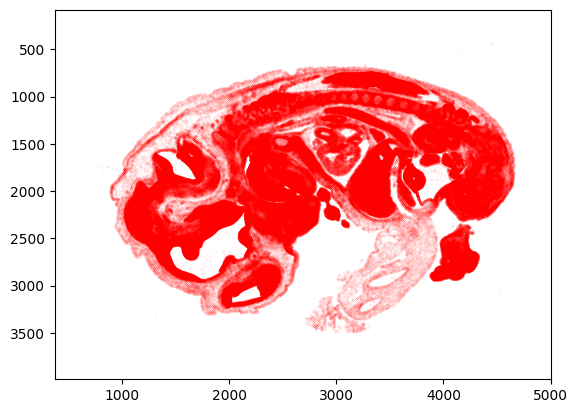

In [23]:
plt.scatter(slide_500['reg_cent_x_5x_cropped'], slide_500['reg_cent_y_5x_cropped'], s=0.001, c='r')
plt.gca().invert_yaxis()

In [24]:
slide_500_volcell = volcell[500,:,:].flatten()  # -1 because first slide 
slide_500_volcell = slide_500_volcell[slide_500_volcell != 0]

In [25]:
slide_500_volcell[:10]

array([2.3142418e+08, 2.3142408e+08, 2.3152192e+08, 2.3142413e+08,
       2.3142379e+08, 2.3142376e+08, 2.3142405e+08, 2.3142413e+08,
       2.3142405e+08, 2.3142416e+08], dtype=float32)

In [26]:
features_df_subset_test = features_df.iloc[slide_500_volcell]

In [27]:
temp = [x for x in features_df_subset_test['volcell_z']]

In [28]:
np.unique(features_df_subset_test['volcell_z'])

array([500., 501.])

In [29]:
temp[-10:]

[500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0]

In [35]:
total = 0
for i in range(len(temp)):
    val = temp[i]
    if val == 501:
        print(f'{i}: {val}')

554808: 501.0
562144: 501.0
620440: 501.0
621136: 501.0


In [31]:
slide_500_volcell = volcell[500,:,:]

shp = np.shape(slide_500_volcell)

In [32]:
non_zero_found = False

for i in range(shp[0]):
    for j in range(shp[1]):
        if slide_500_volcell[i, j] != 0:
            print(i, j)
            non_zero_found = True
            break
    if non_zero_found:
        break

14 1078


In [33]:
features_df.loc[slide_500_volcell[i, j]]

reg_cent_x_5x_cropped    1407.973145
reg_cent_y_5x_cropped    1691.696533
Centroid_x               7088.000000
Centroid_y               6480.000000
Area                       95.562500
Perimeter                  35.750000
Circularity                 0.939453
Aspect                      1.122070
compactness                13.375000
eccentricity                0.453857
extent                      0.774414
form_factor                 1.064453
maximum_radius              6.187500
mean_radius                 5.519531
median_radius               5.609375
minor_axis_length          10.484375
orientation_degrees       383.000000
r_mean_intensity           -1.456350
g_mean_intensity           -0.968121
b_mean_intensity           -1.150048
Slide_num                 514.000000
volcell_z                 500.000000
Name: 231424176, dtype: float64